<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Anteriores/MN2021_Chapra28_25_Catenaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Nombre:** 

Jaime A. Valencia

Esteban Velilla

**Email:**

jalejandro.valencia@udea.edu.co

esteban.velilla@udea.edu.co

**Curso:**
Metodos numericos

**Fecha:**
Martes 14 de septiembre del 2021

# Descripcion

**Objetivos:**

Solucion numerica de la ecuacion diferencial de segundo orden con condiciones de frontera que describe la curva Catenaria de un cable tendido entre 2 soportes. Metodo del disparo.

**Desarrollo:**

1.   Programacion de funcion
2.   Solucion con Scipy
3.   Representacion grafica


# Programacion de funcion



Cable tendido
Problema 28.25 Chapra-Canale


$ \frac{d^{2}y}{dx^{2}} =  \frac{w_{0}}{T_{0}}[1 + sin(\frac{\pi x}{2L_{A}})] $

$y(0)= 0$
$y'(0) = 0$

$y(200) = 50.0$

$w_{o} = 1000.0$

$T_{o} = ???? $

Cambio de variables para transformar la ED de orden 2 en una ED vectorial de orden 1.

$ \overline u = \begin{bmatrix}u_{0}, & u_{1} \ \end{bmatrix}=\begin{bmatrix}y, & y' \ \end{bmatrix} $

$ \frac{d}{dt}  \overline u = \begin{bmatrix}y', & y'' \ \end{bmatrix} = \begin{bmatrix}u_{1}, & \frac{w_{0}}{T_{0}}[1 + sin(\frac{\pi x}{2L_{A}})]\ \end{bmatrix}$





In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def FunCaten02(U, x,wo=1000.0,To=100.0):
    """U: funcion vectorial dependiente de x
       x: variable independiente
       U = [y, y']
       
    """
    La = 200 #ft

    uo = U[0] 
    u1 = U[1] 
    d_uo = u1
    d_u1 = (wo/To)*(1+ np.sin(np.pi*x/(2*La)))
    res = np.array([d_uo, d_u1])
    return res


# Solucion con scipy

In [ ]:
#condiciones de frontera
# condiciones de frontera
# altura en 0 = 40    altura en 200 = 50

#edicion de condiciones iniciales
u_o = 0
u_1 = 0 ##esta condicion se debe variar hasta que 
        ##se cumpla la otra condicion de frontera 
        ## u_o(2)= 50
Uo = [u_o, u_1]

print('Condiciones iniciales ', Uo)

##definir rango de solucion
x_inicial = 0
x_final= 200.0 #ft
sample = 20
X = np.linspace(x_inicial, x_final, sample)

print('Solucion entre ',x_inicial,' y ',x_final)

##Solucionar la ED
y_sol = odeint(FunCaten02, Uo, X,args=(1000.0, 585068.0514600921))

print("Solucion de la ED y_sol",y_sol.shape)
print("u_o(2) - 2: ",y_sol[-1,0]-50)

Condiciones iniciales  [0, 0]
Solucion entre  0  y  200.0
Solucion de la ED y_sol (20, 2)
u_o(2) - 2:  9.237055564881302e-14


# Representacion grafica

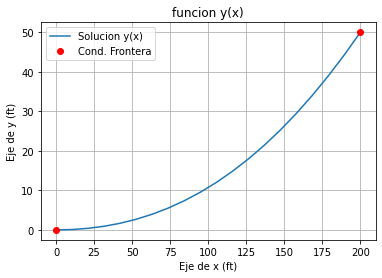

In [ ]:
#Graficar resultados usando Matplotlib
y_x = y_sol[:,0]
#dy_t = y_sol[:,1]

plt.figure(1)
plt.plot(X, y_x,[X[0],X[-1]],[0,50],"ro")
plt.legend(["Solucion y(x)","Cond. Frontera"])
plt.title('funcion y(x)')
plt.xlabel('Eje de x (ft)')
plt.ylabel('Eje de y (ft)')
plt.grid(True)

plt.show()

# Metodo Busqueda de RAIZ

In [ ]:
# Funcion de una sola variable
# para cada valor u_1 calculo: u_o - c.frontera

from scipy import optimize

def RDisparo02(TTo):
  u_o = 0.
  u_1 = 0. ##esta condicion se debe variar hasta que 
          ##se cumpla la otra condicion de frontera u_o(2)= 2.0
  Uo = [u_o, u_1]
  ##definir rango de solucion
  t_inicial = 0; t_final= 200.0; sample = 20
  X = np.linspace(t_inicial, t_final, sample)

  ##Solucionar la ED
  y_sol = odeint(FunCaten02, Uo, X,args=(1000.0, TTo))

  error = y_sol[-1,0]- 50.0
  return error

##solucion con algoritmo de busqueda de raices escalares.

Sol_disparo0 = optimize.newton(RDisparo02,10000.)
Sol_disparo1 = optimize.bisect(RDisparo02,500000, 700000)
print("Newton: ",Sol_disparo0)
print("Bisect: ",Sol_disparo1)


Newton:  585068.0514600892
root:  585068.0514600921


# Resultados y conclusiones

**Resultados y analisis:**

Respuesta Problema A quiz Reto 3:

585068.05146


**Conclusiones:**


**Referencias:**

[Odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

[Burden&Faires 9ed](https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

[Scipy-optim](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)